In [2]:
import pandas as pd

### Prepare your data 

In [3]:
baseball = pd.read_csv("Baseball_Data.csv")

In [4]:
baseball_1 = baseball[['events', 'if_fielding_alignment', 'of_fielding_alignment', 'stand', 'launch_speed', 'launch_angle']].copy()

In [5]:
baseball_1["Home Run or Out"] = baseball_1['events']

In [6]:
baseball_copy = baseball_1.copy()

In [7]:
baseball_copy['Home Run or Out'].replace('field_out', 'Out', inplace = True)

In [8]:
baseball_copy['Home Run or Out'].replace('field_error', 'Out', inplace = True)

In [9]:
baseball_copy['Home Run or Out'].replace('fielders_choice_out', 'Out', inplace = True)

In [10]:
baseball_copy['Home Run or Out'].replace('fielders_choice', 'Out', inplace = True)

In [11]:
baseball_copy['Home Run or Out'].replace('single', 'Hit - Not Home Run', inplace = True)

In [12]:
baseball_copy['Home Run or Out'].replace('double', 'Hit - Not Home Run', inplace = True)

In [13]:
baseball_copy['Home Run or Out'].replace('triple', 'Hit - Not Home Run', inplace = True)

In [14]:
baseball_copy['Home Run or Out'].replace('double_play', 'Out', inplace = True)

In [15]:
baseball_copy['Home Run or Out'].replace('home_run', 'Home Run', inplace = True)

In [16]:
from sklearn.utils import shuffle
import numpy as np
baseball_shuffled = shuffle(baseball_copy)

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
baseball_final = baseball_shuffled[['if_fielding_alignment', 'of_fielding_alignment', 'stand', 'launch_speed', 'launch_angle', 'Home Run or Out']].copy()
baseball_short = baseball_final[['launch_speed', 'launch_angle', 'Home Run or Out']].copy()

### Select your target variable
#### The algorithm will predict a Home Run, Hit - No Home Run, or Out based on the launch angle and launch speed of the batted baseball

In [91]:
X = baseball_short.iloc[:, :-1].values
y = baseball_short.iloc[:, 2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [92]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10963, 2) (10963,)
(4699, 2) (4699,)


### KNN Classifier

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("knn score: {}".format(knn.score(X_train, y_train)))

knn score: 0.8519565812277661


In [100]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [101]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    training_accuracy.append(knn.score(X_train, y_train))
    
    test_accuracy.append(knn.score(X_test, y_test))
    

Legend


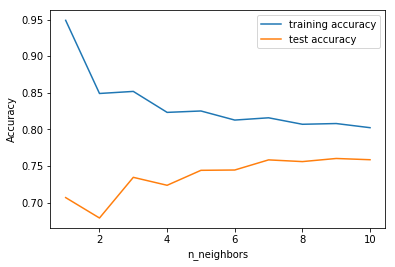

In [102]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
print(plt.legend())

#### 10 neighbors allows for a more accurate test accuracy score at the expense of a lower training accuracy score

In [98]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print("knn score: {}".format(knn.score(X_train, y_train)))

from sklearn.metrics import classification_report
print(classification_report(y_test, knn.predict(X_test)))



knn score: 0.8024263431542461
                    precision    recall  f1-score   support

Hit - Not Home Run       0.65      0.67      0.66      1505
          Home Run       0.64      0.65      0.65       225
               Out       0.82      0.81      0.82      2969

         micro avg       0.76      0.76      0.76      4699
         macro avg       0.71      0.71      0.71      4699
      weighted avg       0.76      0.76      0.76      4699



### Decision Tree Classifier

In [84]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.954
Accuracy on test set: 0.697


In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tree.predict(X_test)))

                    precision    recall  f1-score   support

Hit - Not Home Run       0.57      0.61      0.59      1504
          Home Run       0.53      0.60      0.56       236
               Out       0.79      0.75      0.77      2959

         micro avg       0.70      0.70      0.70      4699
         macro avg       0.63      0.65      0.64      4699
      weighted avg       0.70      0.70      0.70      4699

